# Train: 3,641 / Test: 1,962 / ALL: 5,603

# Annotation: (x(left-top), y(left-top), w, h): 11,047

In [16]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json
import shutil
from sklearn.model_selection import train_test_split
import shutil

In [2]:
img_dir = '/media/data2/dataset/SSDD/800/HRSID-master/data/HRSID_JPG/HRSID_JPG/train/480/img'
label_dir = '/media/data2/dataset/SSDD/800/HRSID-master/data/HRSID_JPG/HRSID_JPG/train/480/xml'

In [3]:
img_list = np.sort(os.listdir(img_dir))
label_list = np.sort(os.listdir(label_dir))

In [4]:
per = len(img_list)

In [5]:
len_train_dt, len_train_rl, len_val_dt, len_val_rl = int(per*0.47), int(per*0.33)+1, int(per*0.11), int(per*0.09)+1

In [6]:
print(per, len_train_dt, len_train_rl, len_val_dt, len_val_rl)

7477 3514 2468 822 673


In [7]:
len_train_dt + len_train_rl + len_val_dt + len_val_rl

7477

# Train_dt (47%) / Train_rl(33%) / Val_dt(11%) / Val_rl(9%)

In [8]:
Train_dt_img, img_left, Train_dt_xml, xml_left =  train_test_split(img_list, label_list, train_size=len_train_dt, )

In [13]:
print(Train_dt_img)
print(len(Train_dt_img))
print(Train_dt_xml)
print(len(Train_dt_xml))

['P0122_0_800_3600_4400_2.jpg' 'P0114_3600_4400_7200_8000_3.jpg'
 'P0001_3000_3800_3000_3800_2.jpg' ... 'P0047_0_800_3600_4400_3.jpg'
 'P0015_3000_3800_3600_4400_1.jpg' 'P0056_2400_3200_4800_5600_3.jpg']
3514
['P0122_0_800_3600_4400_2.xml' 'P0114_3600_4400_7200_8000_3.xml'
 'P0001_3000_3800_3000_3800_2.xml' ... 'P0047_0_800_3600_4400_3.xml'
 'P0015_3000_3800_3600_4400_1.xml' 'P0056_2400_3200_4800_5600_3.xml']
3514


In [10]:
Train_rl_img, img_left2, Train_rl_xml, xml_left2 =  train_test_split(img_left, xml_left, train_size=len_train_rl)

In [14]:
print(Train_dt_img)
print(len(Train_dt_img))
print(Train_dt_xml)
print(len(Train_dt_xml))

['P0122_0_800_3600_4400_2.jpg' 'P0114_3600_4400_7200_8000_3.jpg'
 'P0001_3000_3800_3000_3800_2.jpg' ... 'P0047_0_800_3600_4400_3.jpg'
 'P0015_3000_3800_3600_4400_1.jpg' 'P0056_2400_3200_4800_5600_3.jpg']
3514
['P0122_0_800_3600_4400_2.xml' 'P0114_3600_4400_7200_8000_3.xml'
 'P0001_3000_3800_3000_3800_2.xml' ... 'P0047_0_800_3600_4400_3.xml'
 'P0015_3000_3800_3600_4400_1.xml' 'P0056_2400_3200_4800_5600_3.xml']
3514


In [12]:
Val_dt_img, Val_rl_img, Val_dt_xml, Val_rl_xml =  train_test_split(img_left2, xml_left2, train_size=len_val_dt)

In [15]:
print(len(Val_dt_img))
print(len(Val_dt_xml))
print(len(Val_rl_img))
print(len(Val_rl_xml))

822
822
673
673


In [26]:
train_dt = [Train_dt_img, Train_dt_xml]
train_rl = [Train_rl_img, Train_rl_xml]
val_dt = [Val_dt_img, Val_dt_xml]
val_rl = [Val_rl_img, Val_rl_xml]

In [37]:
save_img_dir = '/media/data2/dataset/SSDD/800/val_rl/img'
save_xml_dir = '/media/data2/dataset/SSDD/800/val_rl/xml'
for idx in range(len_val_rl):
    source_img = os.path.join(img_dir, Val_rl_img[idx])
    source_xml = os.path.join(label_dir, Val_rl_xml[idx])
    target_img = os.path.join(save_img_dir, Val_rl_img[idx])
    target_xml = os.path.join(save_xml_dir, Val_rl_xml[idx])
    shutil.copy2(source_img, target_img)
    shutil.copy2(source_xml, target_xml)    

In [32]:
train_dt

[array(['P0122_0_800_3600_4400_2.jpg', 'P0114_3600_4400_7200_8000_3.jpg',
        'P0001_3000_3800_3000_3800_2.jpg', ...,
        'P0047_0_800_3600_4400_3.jpg', 'P0015_3000_3800_3600_4400_1.jpg',
        'P0056_2400_3200_4800_5600_3.jpg'], dtype='<U34'),
 array(['P0122_0_800_3600_4400_2.xml', 'P0114_3600_4400_7200_8000_3.xml',
        'P0001_3000_3800_3000_3800_2.xml', ...,
        'P0047_0_800_3600_4400_3.xml', 'P0015_3000_3800_3600_4400_1.xml',
        'P0056_2400_3200_4800_5600_3.xml'], dtype='<U34')]

In [91]:
anno_dir = data_dir+'/data/HRSID_JPG/HRSID_JPG/annotations/train2017.json'
test_anno_dir = data_dir+'/data/HRSID_JPG/HRSID_JPG/annotations/test2017.json'
jpg_dir = data_dir+ '/data/HRSID_JPG/HRSID_JPG/JPEGImages'
train_dir = data_dir+'/data/HRSID_JPG/HRSID_JPG/train'
test_dir = data_dir+'/data/HRSID_JPG/HRSID_JPG/test'

In [48]:
with open(anno_dir) as json_file:
    data = json.load(json_file)

In [73]:
with open(test_anno_dir) as json_file:
    test_data = json.load(json_file)

In [98]:
for train_image in test_data['images']:
    org_dir = os.path.join(train_dir, train_image['file_name'])
    new_dir = os.path.join(test_dir, train_image['file_name'])
    shutil.move(org_dir, new_dir)

In [84]:
os.path.join(jpg_dir,data['images'][0]['file_name'])

'/media/data2/dataset/SSDD/High resolution sar images dataset_HRSID/HRSID-master/data/HRSID_JPG/HRSID_JPG/JPEGImages/P0001_0_800_7200_8000.jpg'

In [99]:
len(anno)

11047

In [146]:
len(anno)

11047

In [49]:
anno = data['annotations']

In [78]:
len(data['images'])

3642

In [79]:
len(test_data['images'])

1962

In [139]:
dm_dir = os.path.join(train_dir, data['images'][-1]['file_name'])

In [140]:
dm_dir

'/media/data2/dataset/SSDD/High resolution sar images dataset_HRSID/HRSID-master/data/HRSID_JPG/HRSID_JPG/train/P0137_98.jpg'

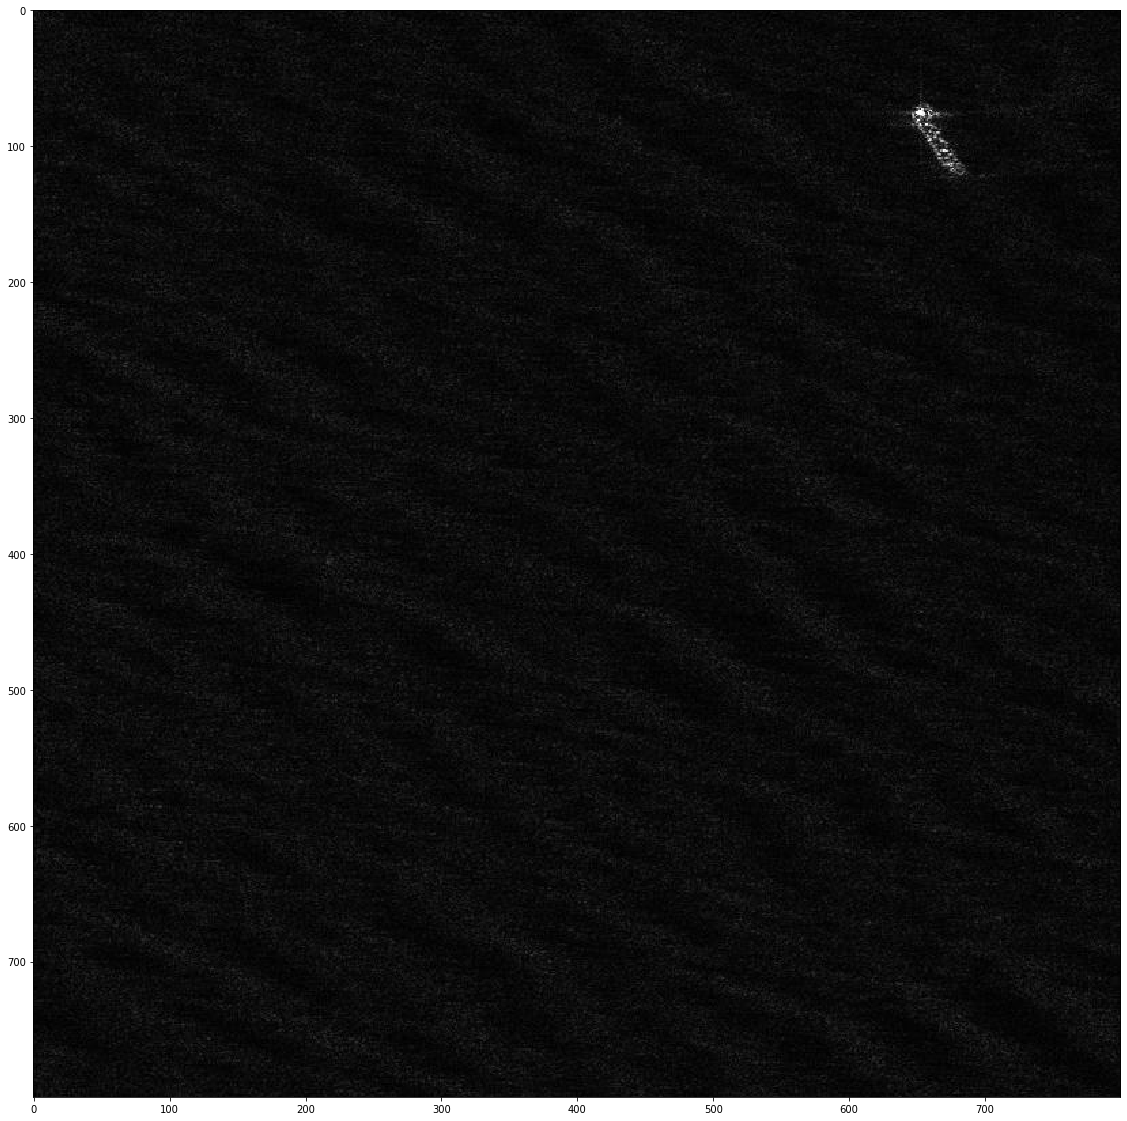

In [141]:
img = cv2.imread(dm_dir)
plt.figure(figsize = (20,20))
plt.imshow(img)

In [142]:
bb = anno[-1]['bbox']

In [143]:
bb

[645.0, 68.0, 41.0, 54.0]

In [144]:
tt = cv2.rectangle(img, (int(bb[0]), int(bb[1])), (int(bb[0]+bb[2]), int(bb[1]+bb[3])), (0,0,255), 3)

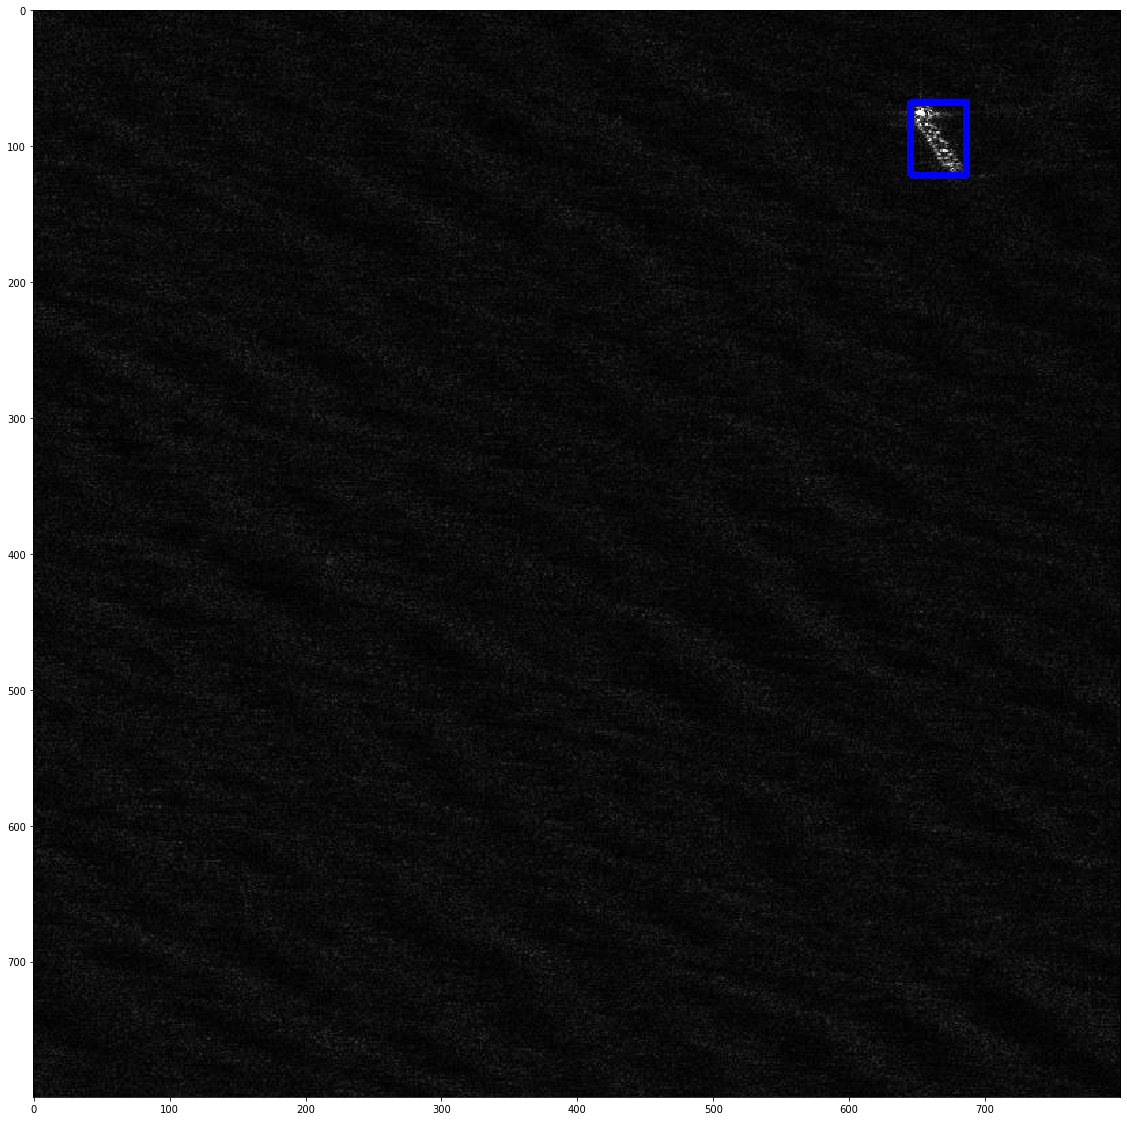

In [145]:
plt.figure(figsize = (20,20))
plt.imshow(tt)

In [106]:
anno[0]

{'id': 0,
 'image_id': 0,
 'category_id': 1,
 'segmentation': [[605.0,
   556.0,
   604.0,
   557.0,
   604.0,
   558.0,
   604.0,
   559.0,
   603.0,
   560.0,
   603.0,
   561.0,
   603.0,
   562.0,
   604.0,
   563.0,
   604.0,
   564.0,
   605.0,
   565.0,
   606.0,
   565.0,
   607.0,
   565.0,
   608.0,
   564.0,
   609.0,
   564.0,
   610.0,
   564.0,
   610.0,
   563.0,
   610.0,
   562.0,
   609.0,
   561.0,
   609.0,
   560.0,
   609.0,
   559.0,
   609.0,
   558.0,
   609.0,
   557.0,
   608.0,
   556.0,
   607.0,
   556.0,
   606.0,
   556.0]],
 'area': 61.0,
 'bbox': [603.0, 556.0, 8.0, 10.0],
 'iscrowd': 0}

In [107]:
anno[1]

{'id': 1,
 'image_id': 0,
 'category_id': 1,
 'segmentation': [[469.0,
   64.0,
   468.0,
   65.0,
   467.0,
   65.0,
   466.0,
   66.0,
   465.0,
   67.0,
   465.0,
   68.0,
   465.0,
   69.0,
   465.0,
   70.0,
   465.0,
   71.0,
   465.0,
   72.0,
   465.0,
   73.0,
   465.0,
   74.0,
   465.0,
   75.0,
   466.0,
   76.0,
   466.0,
   77.0,
   466.0,
   78.0,
   466.0,
   79.0,
   466.0,
   80.0,
   466.0,
   81.0,
   466.0,
   82.0,
   466.0,
   83.0,
   466.0,
   84.0,
   466.0,
   85.0,
   467.0,
   86.0,
   467.0,
   87.0,
   467.0,
   88.0,
   467.0,
   89.0,
   467.0,
   90.0,
   467.0,
   91.0,
   467.0,
   92.0,
   467.0,
   93.0,
   467.0,
   94.0,
   467.0,
   95.0,
   467.0,
   96.0,
   468.0,
   97.0,
   469.0,
   97.0,
   470.0,
   97.0,
   471.0,
   97.0,
   472.0,
   97.0,
   473.0,
   96.0,
   474.0,
   95.0,
   474.0,
   94.0,
   474.0,
   93.0,
   474.0,
   92.0,
   474.0,
   91.0,
   474.0,
   90.0,
   474.0,
   89.0,
   474.0,
   88.0,
   474.0,
   87.0,
   474.0